### Name: Md Salahuddin Chowdhury, I’d: 23029856, Github: [https://github.com/sajal329/Data-Clustering-and-Fitting](https://github.com/sajal329/Data-Clustering-and-Fitting)


In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
import scipy.stats as ss
from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial as Poly

In [79]:
# Load the dataset
df = pd.read_csv('clustering_assignment_data.csv')

# Remove non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate and print mean
mean_values = numeric_df.mean()
print("Mean values:\n", mean_values)

# Calculate and print median
median_values = numeric_df.median()
print("\nMedian values:\n", median_values)

# Calculate and print standard deviation
std_values = numeric_df.std()
print("\nStandard deviation values:\n", std_values)

# Calculate and print skewness
skewness_values = numeric_df.skew()
print("\nSkewness values:\n", skewness_values)

# Calculate and print kurtosis
kurtosis_values = numeric_df.kurtosis()
print("\nKurtosis values:\n", kurtosis_values)

# Calculate and print correlation
correlation_matrix = numeric_df.corr()
print("\nCorrelation matrix:\n", correlation_matrix)

# Use the describe function to get basic statistics
describe_stats = numeric_df.describe()
print("\nDescribe statistics:\n", describe_stats)
df.columns

Mean values:
 Apps            3001.638353
Accept          2018.804376
Enroll           779.972973
Top10perc         27.558559
Top25perc         55.796654
F.Undergrad     3699.907336
P.Undergrad      855.298584
Outstate       10440.669241
Room.Board      4357.526384
Books            549.380952
Personal        1340.642214
PhD               72.660232
Terminal          79.702703
S.F.Ratio         14.089704
perc.alumni       22.743887
Expend          9660.171171
Grad.Rate         65.463320
dtype: float64

Median values:
 Apps           1558.0
Accept         1110.0
Enroll          434.0
Top10perc        23.0
Top25perc        54.0
F.Undergrad    1707.0
P.Undergrad     353.0
Outstate       9990.0
Room.Board     4200.0
Books           500.0
Personal       1200.0
PhD              75.0
Terminal         82.0
S.F.Ratio        13.6
perc.alumni      21.0
Expend         8377.0
Grad.Rate        65.0
dtype: float64

Standard deviation values:
 Apps           3870.201484
Accept         2451.113971
Enroll

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')

In [53]:
    # Handle missing values (if any)
df.dropna(inplace=True)

# Select features for clustering
features = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 
            'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 
            'perc.alumni', 'Expend', 'Grad.Rate']

# Normalize the features
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

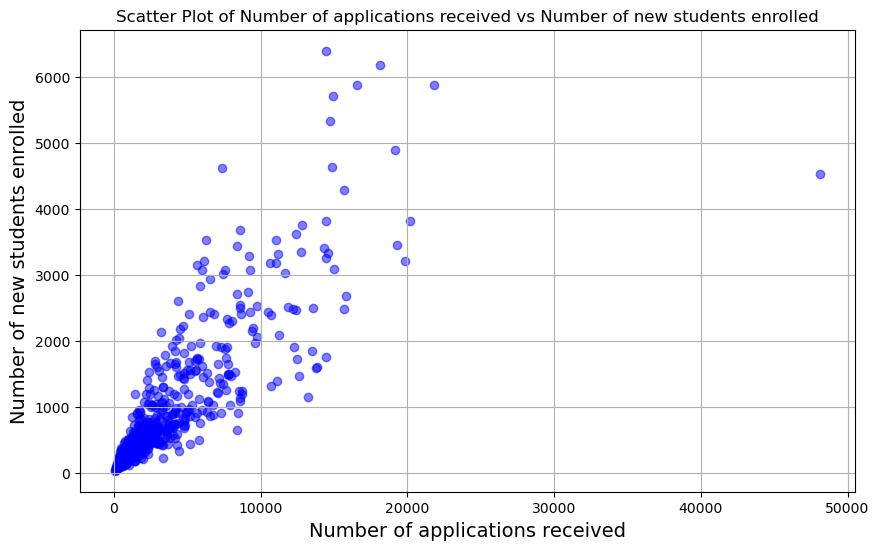

In [81]:
def plot_scatter(data, x_column, y_column):
    """
    Creates a scatter plot of the given columns.
    
    Parameters:
    data (DataFrame): The dataset.
    x_column (str): The name of the column to be plotted on the x-axis.
    y_column (str): The name of the column to be plotted on the y-axis.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x_column], data[y_column], color='blue', alpha=0.5)
    plt.xlabel('Number of applications received', fontsize=14)
    plt.ylabel('Number of new students enrolled', fontsize=14)
    plt.title(f'Scatter Plot of Number of applications received vs Number of new students enrolled')
    plt.grid(True)
    plt.savefig(f'plots/scatter_plot.png')
    plt.show()

plot_scatter(df, 'Apps', 'Enroll')

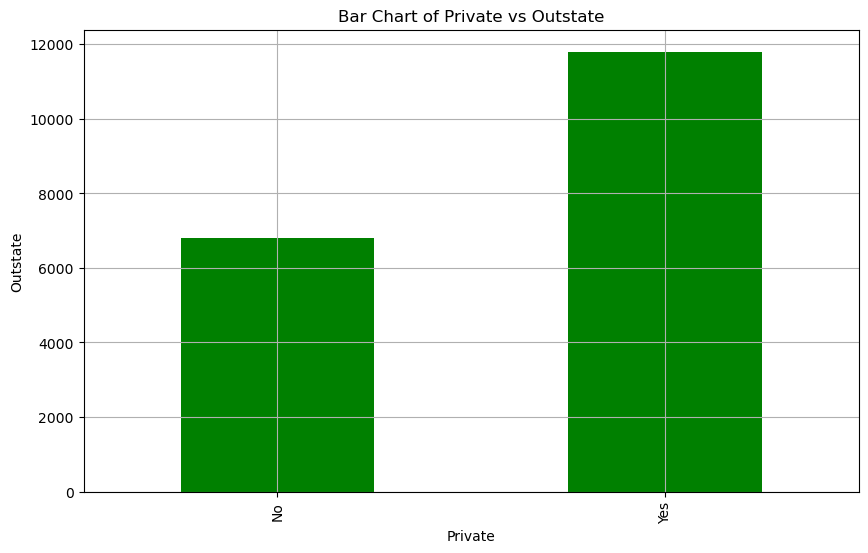

In [82]:
def plot_bar(data, x_column, y_column):
    """
    Creates a bar chart of the given columns.
    
    Parameters:
    data (DataFrame): The dataset.
    x_column (str): The name of the column to be plotted on the x-axis.
    y_column (str): The name of the column to be plotted on the y-axis.
    """
    plt.figure(figsize=(10, 6))
    data.groupby(x_column)[y_column].mean().plot(kind='bar', color='green')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Bar Chart of {x_column} vs {y_column}')
    plt.grid(True)
    plt.savefig(f'plots/bar_{x_column}_vs_{y_column}.png')
    plt.show()

plot_bar(df, 'Private', 'Outstate')

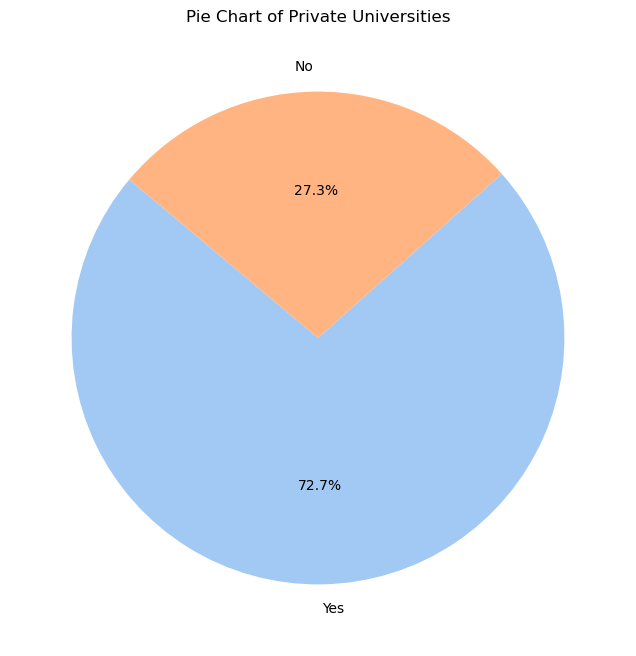

In [83]:
def plot_pie(data, column):
    """
    Creates a pie chart of the given column.
    
    Parameters:
    data (DataFrame): The dataset.
    column (str): The name of the column to be plotted.
    """
    plt.figure(figsize=(8, 8))
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.ylabel('')
    plt.title(f'Pie Chart of {column} Universities')
    plt.savefig(f'plots/pie_{column}.png')
    plt.show()

plot_pie(df, 'Private')

                 Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.33146

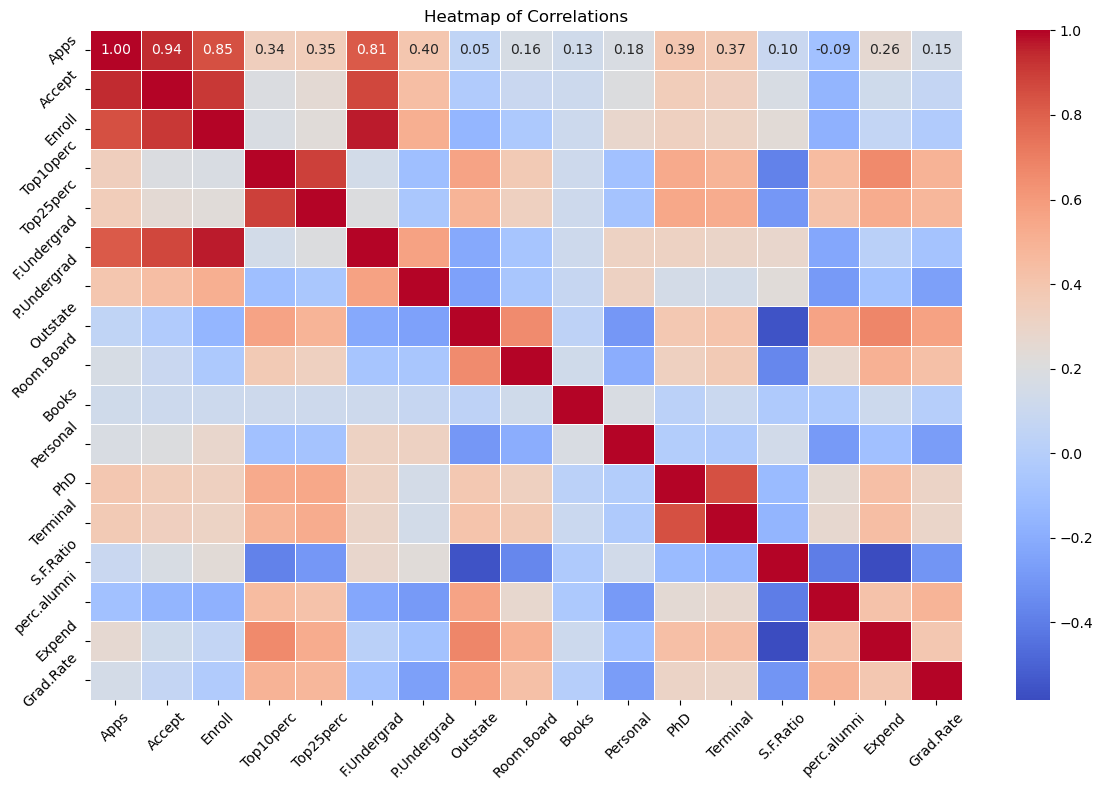

In [84]:
def plot_heatmap(data):
    """
    Creates a heatmap of the correlations between numeric features.
    
    Parameters:
    data (DataFrame): The dataset.
    """
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(method='pearson'), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
    plt.title('Heatmap of Correlations')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent cropping of labels
    plt.savefig('plots/heatmap_correlations.png')
    print(numeric_data.corr(method='pearson'))
    plt.show()

plot_heatmap(df)

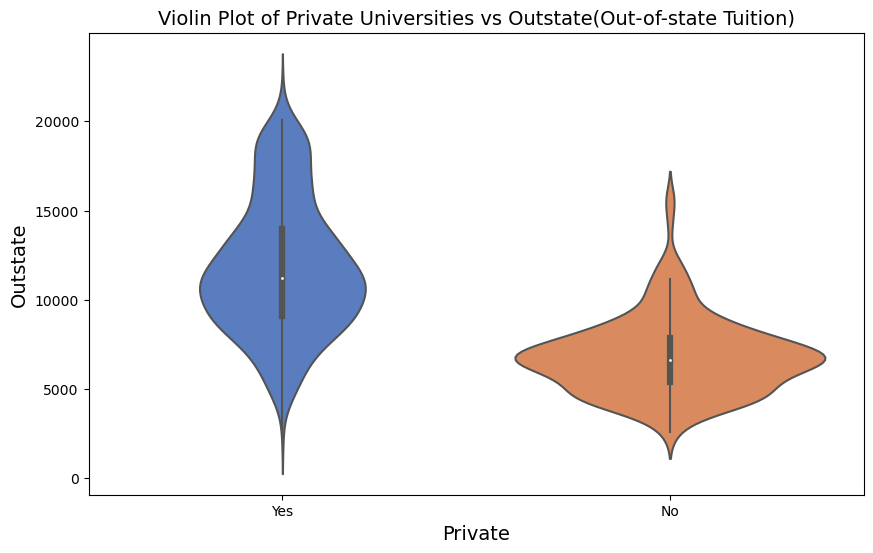

In [85]:
def plot_violin(data, x_column, y_column):
    """
    Creates a violin plot of the given columns.
    
    Parameters:
    data (DataFrame): The dataset.
    x_column (str): The name of the column to be plotted on the x-axis.
    y_column (str): The name of the column to be plotted on the y-axis.
    """
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=data[x_column], y=data[y_column], palette="muted")
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.title(f'Violin Plot of {x_column} Universities vs {y_column}(Out-of-state Tuition)', fontsize=14)
    plt.savefig(f'plots/violin_{x_column}_vs_{y_column}.png')
    plt.show()

plot_violin(df, 'Private', 'Outstate')

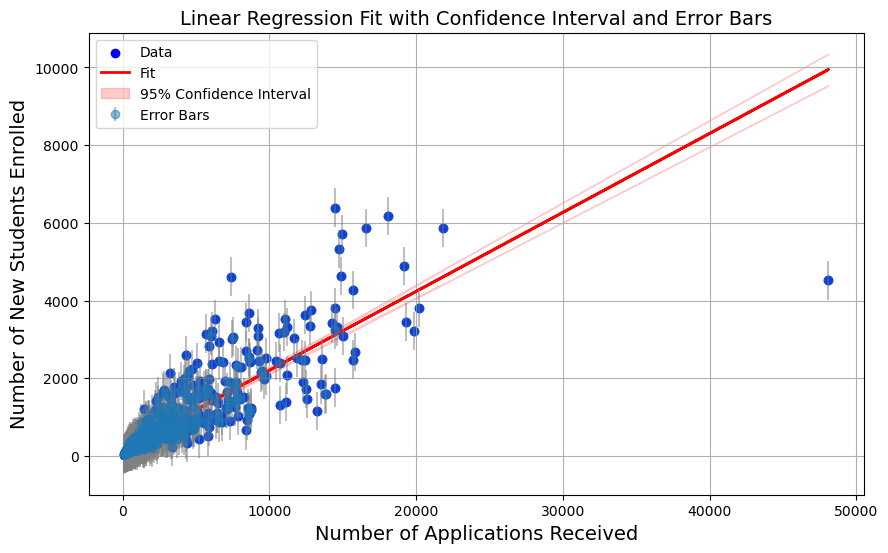

In [86]:
def perform_linear_regression(X, y):
    """
    Fits a linear regression model to the data.
    
    Parameters:
    X (ndarray): The input feature(s).
    y (ndarray): The target variable.
    
    Returns:
    tuple: The fitted model coefficients and covariance matrix.
    """
    # Fit the linear regression model
    def linear_model(x, a, b):
        return a * x + b
    
    params, cov = curve_fit(linear_model, X, y)
    return params, cov

def plot_fit(X, y, params, cov):
    """
    Plots the linear fit with confidence intervals and error bars.
    
    Parameters:
    X (ndarray): The input feature(s).
    y (ndarray): The target variable.
    params (tuple): The model coefficients.
    cov (ndarray): The covariance matrix of the model coefficients.
    """
    # Calculating the fit
    y_fit = params[0] * X + params[1]
    
    # Calculate the standard deviation of the fit
    n = len(y)
    residuals = y - y_fit
    residual_std_error = np.sqrt(np.sum(residuals**2) / (n - 2))  # Standard error of residuals
    ci = 1.96 * residual_std_error * np.sqrt(1 / n + (X - np.mean(X))**2 / np.sum((X - np.mean(X))**2))  # 95% confidence interval
    
    # Plotting the data and the fit
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, y_fit, color='red', linewidth=2, label='Fit')
    
    # Plotting the confidence interval
    plt.fill_between(X, y_fit - ci, y_fit + ci, color='red', alpha=0.2, label='95% Confidence Interval')
    
    # Plotting error bars
    plt.errorbar(X, y, yerr=residual_std_error, fmt='o', ecolor='gray', alpha=0.5, label='Error Bars')

    plt.xlabel('Number of Applications Received', fontsize=14)
    plt.ylabel('Number of New Students Enrolled', fontsize=14)
    plt.title('Linear Regression Fit with Confidence Interval and Error Bars', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.savefig('plots/linear_regression_fit.png')
    plt.show()

# Use 'Apps' as X and 'Enroll' as y
X = df['Apps'].values
y = df['Enroll'].values
params, cov = perform_linear_regression(X, y)
plot_fit(X, y, params, cov)

C:\Users\Master Technology\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Master Technology\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Master Technology\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Master Technology\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

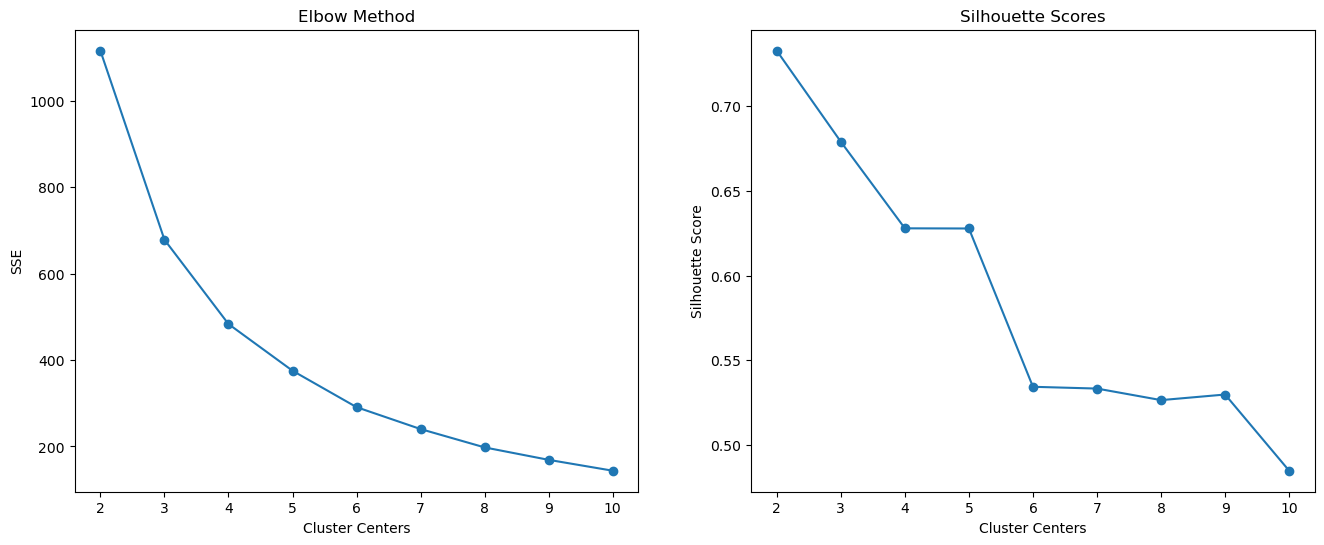

Optimal number of clusters: 2


C:\Users\Master Technology\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Master Technology\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For n_clusters=2, the average silhouette_score is 0.7326227428971878


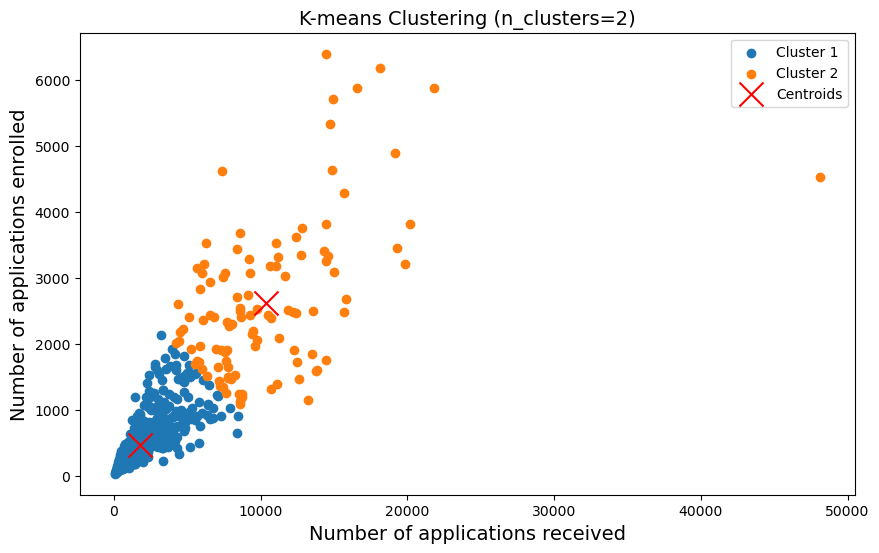

In [87]:
def find_optimal_clusters(data, max_k):
    """
    Uses the elbow method and silhouette scores to find the optimal number of clusters.

    Parameters:
    data (array): The scaled features.
    max_k (int): The maximum number of clusters to test.

    Returns:
    int: Optimal number of clusters.
    """
    iters = range(2, max_k + 1)
    sse = []
    silhouette_scores = []

    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.plot(iters, sse, marker='o')
    ax1.set_xlabel('Cluster Centers')
    ax1.set_ylabel('SSE')
    ax1.set_title('Elbow Method')

    ax2.plot(iters, silhouette_scores, marker='o')
    ax2.set_xlabel('Cluster Centers')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Scores')

    plt.show()

    # Return the optimal number of clusters
    return iters[silhouette_scores.index(max(silhouette_scores))]

def perform_kmeans(data, n_clusters):
    """
    Performs K-Means clustering on the dataset and returns the cluster labels and silhouette score.

    Parameters:
    data (DataFrame): The dataset.
    n_clusters (int): Number of clusters to form.

    Returns:
    array: Cluster labels.
    float: Silhouette score.
    """
    features = data[['Apps', 'Enroll']].values

    # Scaling the features
    scaler = RobustScaler()
    scaled_features = scaler.fit_transform(features)

    # Finding the optimal number of clusters
    optimal_clusters = find_optimal_clusters(scaled_features, max_k=10)
    print(f"Optimal number of clusters: {optimal_clusters}")

    # Performing K-Means clustering
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)

    # Calculating silhouette score
    silhouette_avg = silhouette_score(scaled_features, clusters)
    print(f"For n_clusters={optimal_clusters}, the average silhouette_score is {silhouette_avg}")

    # Backscaling the features and cluster centers for plotting
    unscaled_features = scaler.inverse_transform(scaled_features)
    unscaled_centers = scaler.inverse_transform(kmeans.cluster_centers_)

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    for i in range(optimal_clusters):
        plt.scatter(unscaled_features[clusters == i, 0], unscaled_features[clusters == i, 1], label=f'Cluster {i+1}')
    plt.scatter(unscaled_centers[:, 0], unscaled_centers[:, 1], s=300, c='red', marker='x', label='Centroids')
    plt.xlabel('Number of applications received', fontsize=14)
    plt.ylabel('Number of applications enrolled', fontsize=14)
    plt.title(f'K-means Clustering (n_clusters={optimal_clusters})', fontsize=14)
    plt.legend()
    plt.savefig('plots/kmeans_clustering.png')
    plt.show()

    return clusters, silhouette_avg

clusters, silhouette_avg = perform_kmeans(df, n_clusters=3)